In [16]:
# MSCI 546 Project:

# Link to the original Kaggle Competition (Real Dataset): https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction

In [17]:

# Libraries

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [18]:
# Synthetic Dataset: https://www.kaggle.com/competitions/playground-series-s4e1/data

# Dataset import
import os
# Set directory to project root
os.chdir('/Users/danazarezankova/Documents/BME 2024/BME 4B/MSCI 546/msci-546-proj')

# Back to root directory
synthetic_train_data = pd.read_csv('data/train.csv')

synthetic_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [19]:
# Baseline on Synthetic Dataset - Abdul

In [20]:
# Generate summary statistics
summary_statistics = synthetic_train_data.describe()

summary_statistics

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


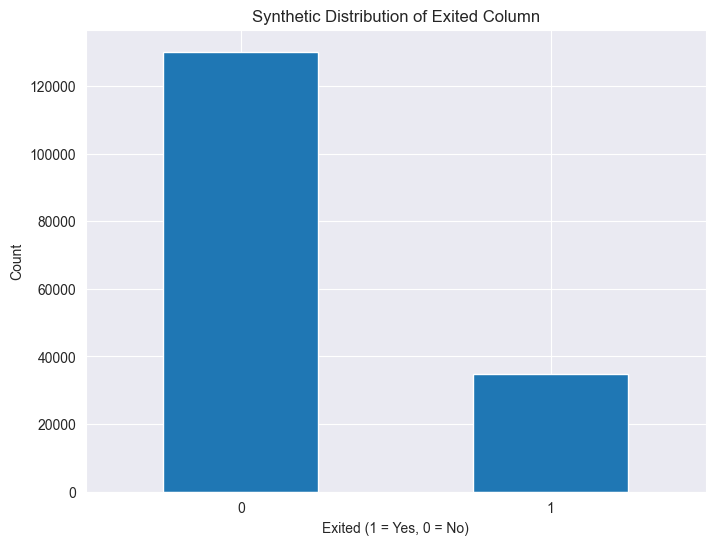

In [21]:
# Visualization of Yes to No

# Count the occurrences of each category in the 'exited' column
exited_counts = synthetic_train_data['Exited'].value_counts()

plt.figure(figsize=(8, 6))
exited_counts.plot(kind='bar')
plt.title('Synthetic Distribution of Exited Column')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()#

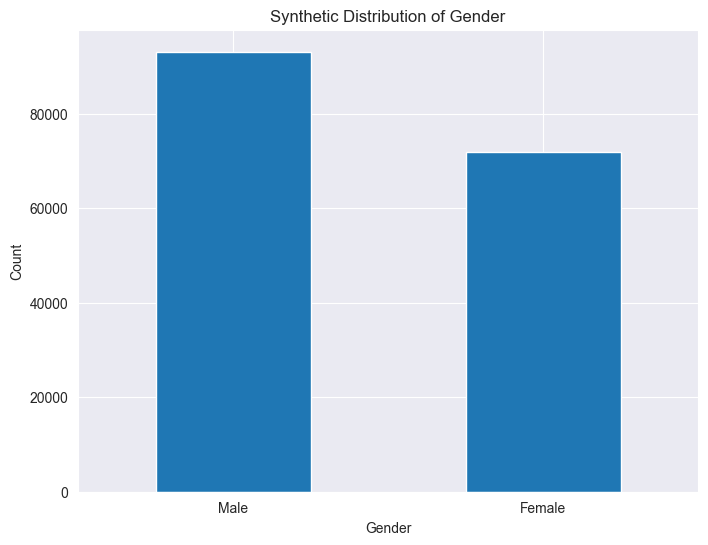

In [22]:
# Gender Distribution
gender_count = synthetic_train_data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_count.plot(kind='bar')
plt.title('Synthetic Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()#

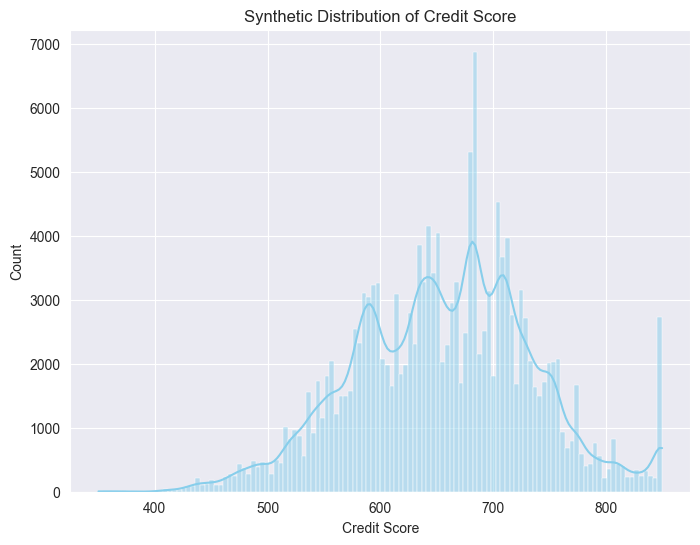

In [23]:
# Histogram of credit scores

plt.figure(figsize=(8, 6))
sns.histplot(synthetic_train_data['CreditScore'], kde=True, color='skyblue')
plt.title('Synthetic Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

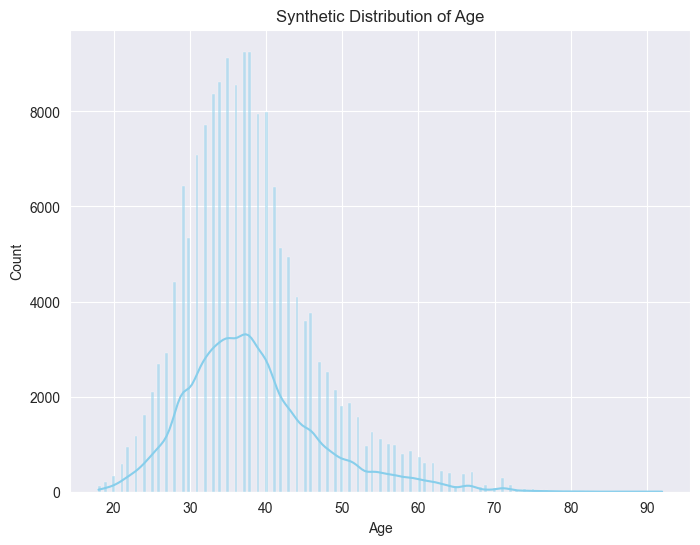

In [24]:
# Age Distribution

plt.figure(figsize=(8, 6))
sns.histplot(synthetic_train_data['Age'], kde=True, color='skyblue')
plt.title('Synthetic Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
#

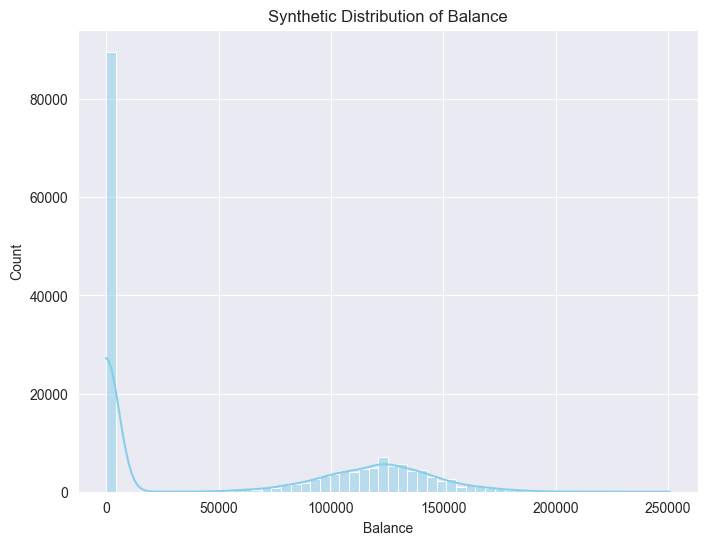

In [25]:
# Salary distribution

plt.figure(figsize=(8, 6))
sns.histplot(synthetic_train_data['Balance'], kde=True, color='skyblue')
plt.title('Synthetic Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

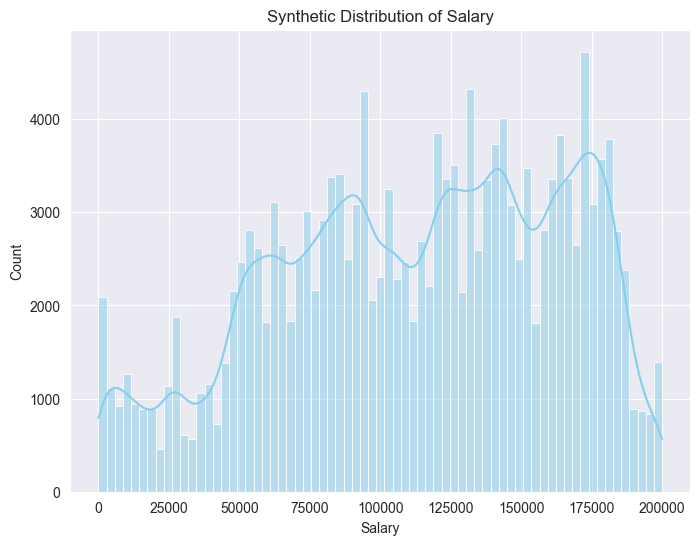

In [26]:
# Salary distribution
plt.figure(figsize=(8, 6))
sns.histplot(synthetic_train_data['EstimatedSalary'], kde=True, color='skyblue')
plt.title('Synthetic Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [27]:
# Label encoding for text data:
encoder = LabelEncoder()
categorical_features_train = synthetic_train_data.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features_train)
for feature in categorical_features_train:
    synthetic_train_data[feature] = encoder.fit_transform(synthetic_train_data[feature])

# MinMax Scaler for credit score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
synthetic_train_data['CreditScore'] = scaler.fit_transform(synthetic_train_data[['CreditScore']])

# Robust Scaler for Balance
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
synthetic_train_data['Balance'] = scaler.fit_transform(synthetic_train_data[['Balance']])

# MinMax Scaler for Estimated Salary
scaler = MinMaxScaler()
synthetic_train_data['EstimatedSalary'] = scaler.fit_transform(synthetic_train_data[['EstimatedSalary']])

# Age / 100
synthetic_train_data['Age'] = synthetic_train_data['Age'] / 100

synthetic_train_data.drop("Surname", axis=1, inplace=True)
synthetic_train_data.drop("CustomerId", axis=1, inplace=True)
synthetic_train_data.drop("id", axis=1, inplace=True)
synthetic_train_data.dropna(inplace=True)

X = synthetic_train_data.drop('Exited', axis=1)
y = synthetic_train_data['Exited']


Categorical features:  Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [28]:
X.describe()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,0.612909,0.648545,0.564429,0.381259,5.020353,0.462551,1.554455,0.753954,0.497770,0.562870
std,0.160207,0.816574,0.495833,0.088672,2.806159,0.523745,0.547154,0.430707,0.499997,0.251488
min,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.494000,0.000000,0.000000,0.320000,3.000000,0.000000,1.000000,1.000000,0.000000,0.373166
50%,0.618000,0.000000,1.000000,0.370000,5.000000,0.000000,2.000000,1.000000,0.000000,0.589738
75%,0.720000,1.000000,1.000000,0.420000,7.000000,1.000000,2.000000,1.000000,1.000000,0.775779
max,1.000000,2.000000,1.000000,0.920000,10.000000,2.091872,4.000000,1.000000,1.000000,1.000000


In [46]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict_proba(X_test)
y_pred_round = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_round)

accuracy

0.8270972823946435

In [47]:
y_pred = y_pred[:,1:]
y_pred

array([[0.25034954],
       [0.03945756],
       [0.07867005],
       ...,
       [0.38566716],
       [0.04208969],
       [0.13112753]])

Precision:  0.6749859786876051
Recall:  0.34608195542774983


Text(0.5, 1.0, 'ROC Curve for Logistic Regression')

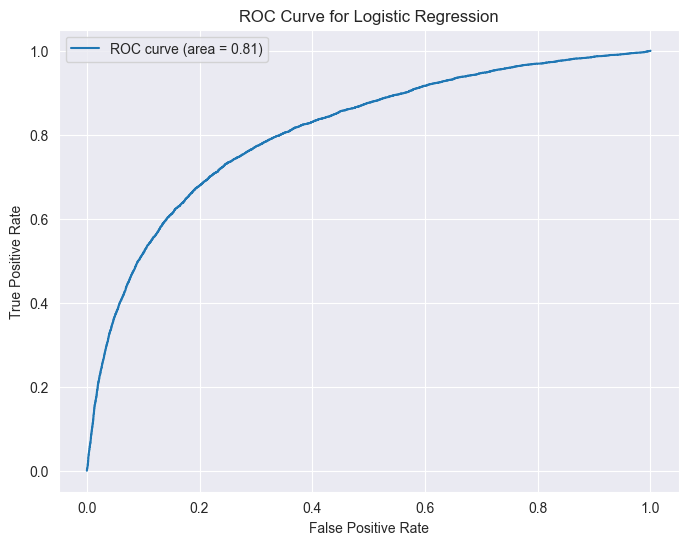

In [51]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred)

precision = metrics.precision_score(y_test, y_pred_round, pos_label=1)
recall = metrics.recall_score(y_test, y_pred_round,pos_label=1)
print("Precision: ", precision)
print("Recall: ", recall)

print()
# Plot the AUROC
plt.figure(figsize=(8, 6))
plt.plot(fp_rate, tp_rate, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve for Logistic Regression')


In [31]:
# Column value vs Coefficients

# Create a dataframe of the coefficients and features
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)
#

           Feature  Coefficient
0      CreditScore    -0.359582
1        Geography     0.109547
2           Gender    -0.672020
3              Age     9.460450
4           Tenure    -0.016007
5          Balance     0.279637
6    NumOfProducts    -0.826300
7        HasCrCard    -0.149525
8   IsActiveMember    -1.284527
9  EstimatedSalary     0.192053


Text(0.5, 427.9555555555555, 'Predicted label')

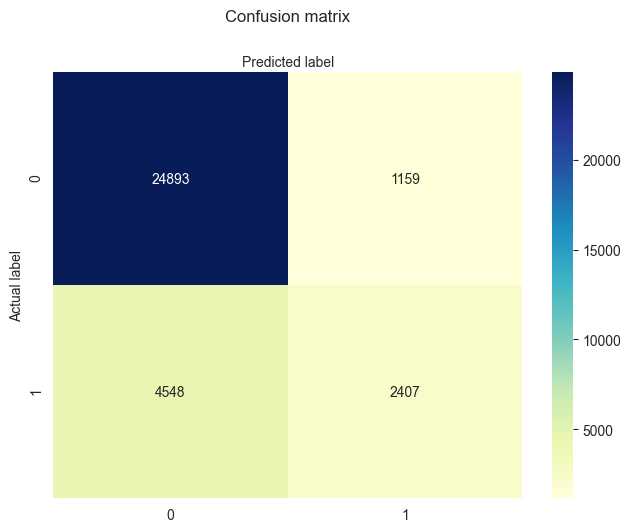

In [53]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_round)
# plot

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_round)

class_names=[0,1] # Names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')